In [31]:
import pandas as pd

# Пункт 3
"""
Буду считать, что продажа-покупка в одну и ту же секунду невозможна.
Вот здесь уже, нам нужно рассматривать все точки
"""

# Считаем файл
df = pd.read_csv('new.csv')


class Bank_account:
    def __init__(self):
        # Контейнер отвечает за инфу(дата, время, прайс, операция)
        # Будем считать прибыль с помощью 2ой перменной
        self._bank_account_info, self._bank_account_profit = [], 0

    # Покупка акций
    def buy(self, price_now, time, date):
        # Методы, используемые библиотекой pandas такие:
        # Смотрим датасет, в котором price сравним с нашим, выбираем оттуда значение времени и тд
        self._bank_account_info.append([price_now,
                                        time,
                                        date,
                                        'buy'])

    # Продажа акций
    def sell(self, price_now, time, date):
        # Так как мы всегда покупаем перед продажей6 вычитаем нашу сумму продажи из предыдущей операции(она всегда покупак)
        self._bank_account_profit += price_now - self._bank_account_info[-1][0]
        # Добавляем инфу
        self._bank_account_info.append([price_now,
                                        time,
                                        date,
                                        'sell'])

    # Вывод информации
    def get_info(self):
        for elements in self._bank_account_info:
            print(elements)
        print('Изменение стоимости акций:',
              self._bank_account_profit)


# Функцию поиска экстремумов:
def search():
    # Нам нужен массив данных со стоимостью, временем и датой
    data = df[['price', 'time', 'date']].values[0:50]
    
    destinations = {}
    # Заводим указатели
    # Здесь мы будем вычитать по модулю из минимумов максимумы, при этом
    # Будем смещать указатели, чтобы не считать расстояние между
    # точкой пика и падения, которые по оси времени идут до достижения одной из точек
    # Т.е. разница между вторым минимумов и самым первым максимумом нас не интересует
    i, j, tmp = 0, 0, 0
    while i < len(data):
        j = tmp
        while j < len(data):
            # Условие на время
            if data[i][1] < data[j][1] and data[j][0] - data[i][0] > 0:
                # Если уже есть разница, добавляем другую комбинацию min, max, из которой можно получить такую же прибыль
                if data[j][0] - data[i][0] in destinations.keys():
                    destinations[data[j][0] - data[i][0]].append([data[j][0],
                                                                       data[i][0],
                                                                       data[j][1],
                                                                       data[i][1],
                                                                       data[j][2],
                                                                       data[i][2]])
                else:
                    destinations[data[j][0] - data[i][0]] = [[data[j][0],
                                                                   data[i][0],
                                                                   data[j][1],
                                                                   data[i][1],
                                                                   data[j][2],
                                                                   data[i][2]]]
            j += 1
            # Смещаем указатель минимумов
        i += 1
        # Смещаем указатель максимумов
        tmp += 1
    # Сортируем по разнице между максимумом и минимумом
    return sorted(destinations.items(), key=lambda x: (-x[0]))


if __name__ == '__main__':
    bank = Bank_account()
    profits = search()
    print(profits)
    maxim = -1
    first, second = [], []
    for i in range(len(profits)):
        for j in range(len(profits)):
            if profits[i][0] + profits[j][0] > maxim and i != j:
                for k in range(len(profits[i][1])):
                    for l in range(len(profits[j][1])):
                        if (profits[j][1][l][2] < profits[i][1][k][3] and
                                profits[j][1][l][3] < profits[i][1][k][3]):
                            maxim = profits[i][0] + profits[j][0]
                            first = [profits[j][1][l][0], profits[j][1][l][1],
                                     profits[j][1][l][2], profits[j][1][l][3],
                                     profits[j][1][l][4], profits[j][1][l][5]]
                            second = [profits[i][1][k][0], profits[i][1][k][1],
                                    profits[i][1][k][2], profits[i][1][k][3],
                                    profits[i][1][k][4], profits[i][1][k][5]]
                        elif (profits[i][1][k][3] < profits[j][1][l][3] and
                              profits[i][1][k][2] < profits[j][1][l][3]):
                            maxim = profits[i][0] + profits[j][0]
                            first = [profits[i][1][k][0], profits[i][1][k][1],
                                    profits[i][1][k][2], profits[i][1][k][3],
                                    profits[i][1][k][4], profits[i][1][k][5]]
                            second = [profits[j][1][l][0], profits[j][1][l][1],
                                     profits[j][1][l][2], profits[j][1][l][3],
                                     profits[j][1][l][4], profits[j][1][l][5]]
    bank.buy(first[1], first[3], first[5])
    bank.sell(first[0], first[2], first[4])
    bank.buy(second[1], second[3], second[5])
    bank.sell(second[0], second[2], second[4])
    bank.get_info()

[(16.0, [[1067.0, 1051.0, 104600.0, 102800.0, 20150105.0, 20150105.0], [1067.0, 1051.0, 104700.0, 102800.0, 20150105.0, 20150105.0], [1067.0, 1051.0, 104800.0, 102800.0, 20150105.0, 20150105.0], [1067.0, 1051.0, 104900.0, 102800.0, 20150105.0, 20150105.0], [1067.0, 1051.0, 105000.0, 102800.0, 20150105.0, 20150105.0]]), (15.0, [[1066.0, 1051.0, 104400.0, 102800.0, 20150105.0, 20150105.0]]), (14.0, [[1065.0, 1051.0, 104300.0, 102800.0, 20150105.0, 20150105.0], [1065.0, 1051.0, 104500.0, 102800.0, 20150105.0, 20150105.0]]), (12.0, [[1067.0, 1055.0, 104600.0, 102900.0, 20150105.0, 20150105.0], [1067.0, 1055.0, 104700.0, 102900.0, 20150105.0, 20150105.0], [1067.0, 1055.0, 104800.0, 102900.0, 20150105.0, 20150105.0], [1067.0, 1055.0, 104900.0, 102900.0, 20150105.0, 20150105.0], [1067.0, 1055.0, 105000.0, 102900.0, 20150105.0, 20150105.0], [1067.0, 1055.0, 104600.0, 103000.0, 20150105.0, 20150105.0], [1067.0, 1055.0, 104700.0, 103000.0, 20150105.0, 20150105.0], [1067.0, 1055.0, 104800.0, 1030

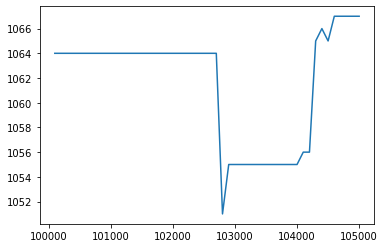

In [30]:
cash = 